In [1]:
# Author: Brent Artuch
# Date: 2024-10-09

import sympy as sp
import numpy as np 
from IPython.display import *

import qsharp
from qiskit.quantum_info import Operator, Statevector

sp.init_printing()

## Column Vectors
3.1 - A qubit has the following state: <br>
\begin{align*}
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}
\end{align*}
Write the state as a column vector:<br>
Answer:<br>
\begin{align*}
\ket{\psi}=\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}=\frac{1}{2}\begin{bmatrix} 1 \\ 0\end{bmatrix}-\frac{\sqrt{3}}{2}\begin{bmatrix} 0 \\ 1\end{bmatrix}=\begin{bmatrix} \frac{1}{2} \\ 0\end{bmatrix}+\begin{bmatrix} 0 \\ -\frac{\sqrt{3}}{2}\end{bmatrix}=\begin{bmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}\end{bmatrix}
\end{align*}

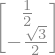

In [2]:
# Using code
psi = Statevector([1/2,-sp.sqrt(3)/2])
column_vector = sp.Matrix([[sp.nsimplify(psi[0])],[sp.nsimplify(psi[1])]])
column_vector

3.2 - A qubit is in the following state: <br>
\begin{align*}
\begin{bmatrix}
\sqrt{3}/2 \\
1/2
\end{bmatrix}
\end{align*}
What are the probabilities if measured in the Z-basis:<br>
Answer:<br>
\begin{align*}
Pr(\text{Measuring } \ket{0})&=\left|\frac{\sqrt{3}}{2}\right|^2= \frac{3}{4}\\
Pr(\text{Measuring } \ket{1})&=\left|\frac{1}{2}\right|^2= \frac{1}{4}\\
\end{align*}

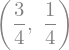

In [3]:
# Using code
psi = Statevector([sp.sqrt(3)/2,1/2])
probabilities = psi.probabilities()
probability_ket_zero = sp.nsimplify(probabilities[0])
probability_ket_one = sp.nsimplify(probabilities[1])
probability_ket_zero, probability_ket_one

## Row Vectors
3.3 - Consider the following states: <br>
\begin{align*}
\ket{a}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}, \ \ \ket{b}=\frac{2}{3}\ket{0}+\frac{1-2i}{3}\ket{1}
\end{align*}
What are $\bra{a}$ and $\bra{b}$?<br>
Answer:<br>
\begin{align*}
\bra{a}&=
\begin{bmatrix}
\frac{\sqrt{3}}{2} \\
\frac{1}{2}
\end{bmatrix}^\dagger=
\begin{bmatrix}
\frac{\sqrt{3}}{2}^* &
\frac{1}{2}^*
\end{bmatrix}=
\begin{bmatrix}
\frac{\sqrt{3}}{2} &
\frac{1}{2}
\end{bmatrix}\\
\bra{b}&=
\begin{bmatrix}
\frac{2}{3} \\
\frac{1-2i}{3}
\end{bmatrix}^\dagger=
\begin{bmatrix}
\frac{2}{3}^* &
\frac{1-2i}{3}^*
\end{bmatrix}=
\begin{bmatrix}
\frac{2}{3} &
\frac{1+2i}{3}
\end{bmatrix}
\end{align*}

In [4]:
# Using code
ket_b = Statevector([2/3,(1 -sp.I*2)/3])
alpha_conjugate = sp.conjugate(ket_b[0])
beta_conjugate = sp.conjugate(ket_b[1])
row_vector = sp.Matrix([[sp.nsimplify(alpha_conjugate),sp.nsimplify(beta_conjugate)]])
row_vector

## Inner Products
3.4 - Consider:<br>
\begin{align*}
\ket{a}=\frac{3+i\sqrt{3}}{4}\ket{0}+\frac{1}{2}\ket{1}, \ \ \ket{b}=\frac{1}{4}\ket{0}+\frac{\sqrt{15}}{4}\ket{1}
\end{align*}
Find $\braket{a|b}$ and $\braket{b|a}$:<br>
Answer: <br>
\begin{align*}
\braket{a|b}&= 
\begin{bmatrix} \frac{3+i\sqrt{3}}{4}^* & \frac{1}{2}^*\end{bmatrix} \begin{bmatrix} \frac{1}{4} \\ \frac{\sqrt{15}}{4}\end{bmatrix} =
\begin{bmatrix} \frac{3-i\sqrt{3}}{4} & \frac{1}{2}\end{bmatrix} \begin{bmatrix} \frac{1}{4} \\ \frac{\sqrt{15}}{4}\end{bmatrix} = \frac{3-i\sqrt{3}}{4}\left(\frac{1}{4}\right) + \frac{1}{2}\left(\frac{\sqrt{15}}{4}\right) = \frac{3-i\sqrt{3}}{16}+ \frac{\sqrt{15}}{8}= \frac{3-i\sqrt{3} + 2\sqrt{15}}{16}
\end{align*}
\begin{align*}
\braket{b|a}&= 
\begin{bmatrix} \frac{1}{4}^* & \frac{\sqrt{15}}{4}^*\end{bmatrix} \begin{bmatrix} \frac{3+i\sqrt{3}}{4} \\ \frac{1}{2}\end{bmatrix} =
\begin{bmatrix} \frac{1}{4} & \frac{\sqrt{15}}{4}\end{bmatrix} \begin{bmatrix} \frac{3+i\sqrt{3}}{4} \\ \frac{1}{2}\end{bmatrix} = \frac{1}{4}\left(\frac{3+i\sqrt{3}}{4}\right) + \frac{\sqrt{15}}{4}\left(\frac{1}{2}\right) = \frac{3+i\sqrt{3}}{16}+ \frac{\sqrt{15}}{8}= \frac{3+i\sqrt{3} + 2\sqrt{15}}{16}
\end{align*}
Notice that $\braket{a|b}$ = $\braket{b|a}^*$ and $\braket{b|a}$ = $\braket{a|b}^*$

In [5]:
# Using code 
ket_a = Statevector([(3+1.0j*np.sqrt(3))/4,(1/2)])
ket_b = Statevector([1/4,np.sqrt(15)/4])

braket_ab_expected_result = (3-1.0j*np.sqrt(3)+2*np.sqrt(15)) / 16
braket_ba_expected_result = (3+1.0j*np.sqrt(3)+2*np.sqrt(15)) / 16

braket_ab = complex(ket_a.inner(ket_b))
braket_ba = complex(ket_b.inner(ket_a))

braket_ab_conjugate = np.conjugate(braket_ab)
braket_ba_conjugate = np.conjugate(braket_ba)

braket_ab == braket_ab_expected_result, braket_ba == braket_ba_expected_result, braket_ba == braket_ab_conjugate, braket_ab == braket_ba_conjugate

(True, True, np.True_, np.True_)

## Orthonormality
3.5 - Consider a qubit with the following state:<br>
\begin{align*}
\ket{\psi}=A(2\ket{0}+3i\ket{1})
\end{align*}
Calculate $\braket{\psi|\psi}$ and find a value of $A$ that normalizes $\ket{\psi}$.<br>
Answer:<br>
\begin{align*}
\braket{\psi|\psi}&=\begin{bmatrix} 2A^* & 3Ai^*\end{bmatrix}\begin{bmatrix} 2A \\ 3Ai\end{bmatrix}=\begin{bmatrix} 2A & -3Ai\end{bmatrix}\begin{bmatrix} 2A \\ 3Ai\end{bmatrix}\\
&=4|A|^2-6Ai+6Ai=9|A|^2=13|A|^2
\end{align*}
Now we can easily find the value of $A$ that normalizes $\ket{\psi}$:
\begin{align*}
13|A|^2&=1\\
|A|^2&=\frac{1}{13}\\
A&=\frac{1}{\sqrt{13}}
\end{align*}

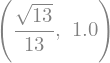

In [6]:
# With code
ket_psi = Statevector([2,3*1.0j])
inner_product = ket_psi.inner(ket_psi)
A_squared = 1 / inner_product.item()
A = sp.sqrt(A_squared)

# Check that inner product is now 1 after normalization
ket_psi_normalized = Statevector([1/np.sqrt(13)*ket_psi[0], 1/np.sqrt(13)*ket_psi[1]])
inner_product = ket_psi_normalized.inner(ket_psi_normalized)
sp.nsimplify(A), inner_product.item().real

3.7 - Consider:<br>
\begin{align*}
\ket{a}&=\frac{3+i\sqrt{3}}{4}\ket{0}+\frac{1}{2}\ket{1}\\
\ket{b}&=\frac{1}{4}\ket{0}+x\ket{1}
\end{align*}
a) Find $x$ so that $\ket{a}$ and $\ket{b}$ are orthogonal.<br>
Answer:<br>
\begin{align*}
\braket{a|b}&=\begin{bmatrix} \frac{3+i\sqrt{3}}{4}^* & \frac{1}{2}^*\end{bmatrix}\begin{bmatrix} \frac{1}{4} \\ x\end{bmatrix}=\begin{bmatrix} \frac{3-i\sqrt{3}}{4} & \frac{1}{2}\end{bmatrix}\begin{bmatrix} \frac{1}{4} \\ x\end{bmatrix}\\
&=\frac{3-i\sqrt{3}}{16}+\frac{x}{2}\\
x&=-2\left(\frac{3-i\sqrt{3}}{16}\right)\\
x&=\frac{-3+i\sqrt{3}}{8}
\end{align*}

In [7]:
# Plug in x
x = (-3+1.0j*np.sqrt(3))/8
ket_a = Statevector([(3+1.0j*np.sqrt(3))/4, 1/2])
ket_b = Statevector([1/4, x])
ket_a.inner(ket_b).item().real

## Projection, Measurement, and Change of Basis
3.9 - Consider a qubit in the following state:<br>
\begin{align*}
\ket{\psi}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}
\end{align*}
Consider meeasuring theis qubit in the $Y$-basis $\{\ket{i}, \ket{-i}\}$ and the orthonormal basis $\{\ket{a}, \ket{b}\}$, where:<br>
\begin{align*}
\ket{a}=\frac{\sqrt{3}}{2}\ket{0}+\frac{i}{2}\ket{1}\\
\ket{b}=\frac{i}{2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}\\
\end{align*}
a) Calculate $\braket{i|\psi}$ and $\braket{-i|\psi}$ as well as their probabilities in the $Y$-basis.<br>
Answer:

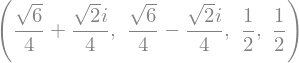

In [8]:
# With Code
# Define states
ket_psi = Statevector([np.sqrt(3)/2, 1/2])
ket_i = Statevector([1/np.sqrt(2), 1.0j/np.sqrt(2)])
ket_minus_i = Statevector([1/np.sqrt(2), -1.0j/np.sqrt(2)])

# Inner Products
braket_i_psi = sp.nsimplify(ket_psi.inner(ket_i).item())
braket_minus_i_psi = sp.nsimplify(ket_psi.inner(ket_minus_i).item())

# Probabilities
probability_i = sp.expand(braket_i_psi*sp.conjugate(braket_i_psi))
probability_minus_i = sp.expand(braket_minus_i_psi*sp.conjugate(braket_minus_i_psi))

braket_i_psi,braket_minus_i_psi,probability_i,probability_minus_i

b) Calculate $\braket{a|\psi}$ and $\braket{b|\psi}$ as well as their probabilities in the $\{\ket{a},\ket{b}\}$ basis.<br>
Answer:

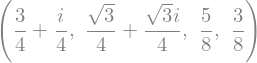

In [9]:
# Define states
ket_a = Statevector([np.sqrt(3)/2, 1.0j/2])
ket_b = Statevector([1.0j/2,np.sqrt(3)/2])

# Inner Products
braket_a_psi = sp.nsimplify(ket_psi.inner(ket_a).item())
braket_b_psi = sp.nsimplify(ket_psi.inner(ket_b).item())

# Probabilities
probability_a = sp.expand(braket_a_psi*sp.conjugate(braket_a_psi))
probability_b = sp.expand(braket_b_psi*sp.conjugate(braket_b_psi))

braket_a_psi,braket_b_psi,probability_a,probability_b

3.10 - Consider the following state:<br>
\begin{align*}
\ket{\psi}=\frac{3+i\sqrt{3}}{4}\ket{0}-\frac{1}{2}\ket{1}
\end{align*}
a) Measure in the $Z$-basis $\{\ket{0},\ket{1}\}$.<br>
Answer:

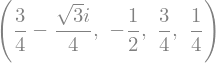

In [10]:
ket_psi = Statevector([(3+1.0j*np.sqrt(3))/4,-1/2])

# X Basis
ket_0 = Statevector([1,0])
ket_1 = Statevector([0,1])

# Inner Products
braket_0_psi = sp.nsimplify(ket_psi.inner(ket_0).item())
braket_1_psi = sp.nsimplify(ket_psi.inner(ket_1).item())

# Probabilities
probability_0 = sp.expand(braket_0_psi*sp.conjugate(braket_0_psi))
probability_1 = sp.expand(braket_1_psi*sp.conjugate(braket_1_psi))

braket_0_psi,braket_1_psi,probability_0,probability_1

b) Measure in the $X$-basis $\{\ket{+},\ket{-}\}$.<br>
Answer:

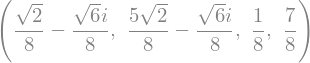

In [11]:
# H-gate
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])

# X-basis
ket_plus = ket_0.evolve(H)
ket_minus = ket_1.evolve(H)

# Inner Products
braket_plus_psi = sp.nsimplify(ket_psi.inner(ket_plus).item())
braket_minus_psi = sp.nsimplify(ket_psi.inner(ket_minus).item())

# Probabilities
probability_plus = sp.expand(braket_plus_psi*sp.conjugate(braket_plus_psi))
probability_minus = sp.expand(braket_minus_psi*sp.conjugate(braket_minus_psi))

braket_plus_psi,braket_minus_psi,probability_plus,probability_minus

c) Measure in the $Y$-basis $\{\ket{i},\ket{-i}\}$.<br>
Answer:

In [12]:
# S-gate
S = Operator([[1, 0], [0, 1.0j]])

# Y-basis
ket_i = ket_plus.evolve(S)
ket_minus_i = ket_minus.evolve(S)

# Inner Products
braket_i_psi = ket_psi.inner(ket_i).item()
braket_minus_i_psi = ket_psi.inner(ket_minus_i).item()

# Probabilities
probability_i = round(sp.expand(braket_i_psi*sp.conjugate(braket_i_psi)),3)
probability_minus_i = round(sp.expand(braket_minus_i_psi*sp.conjugate(braket_minus_i_psi)),3)

braket_i_psi,braket_minus_i_psi,probability_i,probability_minus_i

((0.5303300858899106-0.659739608441171j),
 (0.5303300858899106+0.047367172745376496j),
 0.717,
 0.283)

## Quantum Gates
3.12 - Consider an operator $U$ performs the following mapping on the $Z$-basis states:<br>
\begin{align*}
U\ket{0}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix}, \ \ \ U\ket{1}=\frac{1}{\sqrt{2}}\begin{bmatrix} -i \\ 1 \end{bmatrix},
\end{align*}
a) What is $U$ as a matrix:<br>
Answer:<br>
\begin{align*}
U=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -i \\ -i & 1 \end{bmatrix}
\end{align*}
b) What is $U\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$?<br>
Answer:<br>
\begin{align*}
U\begin{bmatrix} \alpha \\ \beta \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -i \\ -i & 1 \end{bmatrix}\begin{bmatrix} \alpha \\ \beta \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix} \alpha & -i\beta \\ -i\alpha & \beta \end{bmatrix}
\end{align*}
c) Is $U$ a valid quantum gate?<br>
Answer:<br>
Check that the sum of the amplitudes squared is equal to 1.
\begin{align*}
1&=\left|\frac{\alpha - i\beta}{\sqrt{2}}\right|^2+\left|\frac{-i\alpha + \beta}{\sqrt{2}}\right|^2\\
&=\frac{\alpha - i\beta}{\sqrt{2}}\left(\frac{\alpha - i\beta}{\sqrt{2}}\right)^*+\frac{-i\alpha + \beta}{\sqrt{2}}\left(\frac{-i\alpha + \beta}{\sqrt{2}}\right)^*\\
&=\frac{\alpha - i\beta}{\sqrt{2}}\left(\frac{\alpha + i\beta}{\sqrt{2}}\right)+\frac{-i\alpha + \beta}{\sqrt{2}}\left(\frac{i\alpha + \beta}{\sqrt{2}}\right)\\
&=\frac{|a|^2+|\beta|^2}{2}+\frac{|a|^2+|\beta|^2}{2}=\frac{2(|a|^2+|\beta|^2)}{2}=|a|^2+|\beta|^2
\end{align*}
Therefore, $U$ is a valid quantum gate.